# TikTok Project (Covers Parts 2 to 4). Data Cleaning and ML separate notes

**==========================================================================================================**

## Project Description

Welcome to the TikTok Project!

You have just started as a data professional at TikTok.

The team is still in the early stages of the project. You have received notice that TikTok's leadership team has approved the project proposal. To gain clear insights to prepare for a claims classification model, TikTok's provided data must be examined to begin the process of exploratory data analysis (EDA).

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

The team has reviewed the results of the exploratory data analysis and the previous executive summary the team prepared. You received an email from Orion Rainier, Data Scientist at TikTok, with your next assignment: determine and conduct the necessary hypothesis tests and statistical analysis for the TikTok classification project.


## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|# |	TikTok assigned number for video with claim/opinion.|
|claim_status |	Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source.|
|video_id |	Random identifying number assigned to video upon publication on TikTok|
|video_duration_sec |	How long the published video is measured in seconds|
|video_transcription_text |	Transcribed text of the words spoken in the published video |
|verified_status |Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.” 	|
|author_ban_status |Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.” |
|video_view_count |	The total number of times the published video has been viewed. |
|video_like_count | The total number of times the published video has been liked by other users.	|
|video_share_count |The total number of times the published video has been shared by other users.	|
|video_download_count |	The total number of times the published video has been downloaded by other users|
|video_comment_count |	The total number of comments on the published video. |


## Data sources used

This project uses a dataset called tiktok_dataset.csv. It contains synthetic data created for this project in partnership with TikTok. Examine each data variable gathered. 

19,383 rows – Each row represents a different published TikTok video in which a claim/opinion has been made.

## Business Task 1

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to investigate and understand the data provided. This activity will:

1.   Acquaint you with the data

2.   Compile summary information about the data

3.   Begin the process of EDA and reveal insights contained in the data

4.   Prepare you for more in-depth EDA, hypothesis testing, and statistical analysis

**The goal** is to construct a dataframe in Python, perform a cursory inspection of the provided dataset, and inform TikTok data team members of your findings.

## Business Task 2

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

## Business Task 3


In this activity, you will explore the data provided and conduct hypothesis testing.
<br/>

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze hypothesis tests.

**The goal** is to apply descriptive and inferential statistics, probability distributions, and hypothesis testing in Python.
<br/>

*This activity has three parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct hypothesis testing
* How will descriptive statistics help you analyze your data?

* How will you formulate your null hypothesis and alternative hypothesis?

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerge from your hypothesis test?

* What business recommendations do you propose based on your results?

<br/>

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go


#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
#from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
#from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

# Use Folium library to plot values on a map.
#import folium

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Import Data

In [2]:
df = pd.read_csv("tiktok_dataset.csv")

## Data Quick Glance

### Course 2 - Get Started with Python

In [3]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.00,19425.00,241.00,1.00,0.00
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.00,77355.00,19034.00,1161.00,684.00
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.00,97690.00,2858.00,833.00,329.00
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.00,239954.00,34812.00,1234.00,584.00
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.00,34987.00,4110.00,547.00,152.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
df.dtypes.value_counts()

float64    5
object     4
int64      3
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.00,19084,19382.00,19382.00,19084,19382,19382,19084.00,19084.00,19084.00,19084.00,19084.00
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.50,NaN,5627454067.34,32.42,NaN,NaN,NaN,254708.56,84304.64,16735.25,1049.43,349.31
std,5595.25,NaN,2536440464.17,16.23,NaN,NaN,NaN,322893.28,133420.55,32036.17,2004.30,799.64
min,1.00,NaN,1234959018.00,5.00,NaN,NaN,NaN,20.00,0.00,0.00,0.00,0.00
25%,4846.25,NaN,3430416807.25,18.00,NaN,NaN,NaN,4942.50,810.75,115.00,7.00,1.00
50%,9691.50,NaN,5618663579.00,32.00,NaN,NaN,NaN,9954.50,3403.50,717.00,46.00,9.00
75%,14536.75,NaN,7843960211.25,47.00,NaN,NaN,NaN,504327.00,125020.00,18222.00,1156.25,292.00


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.00,19382.00,19382.00,19084.00,19084.00,19084.00,19084.00,19084.00
mean,9691.50,5627454067.34,32.42,254708.56,84304.64,16735.25,1049.43,349.31
std,5595.25,2536440464.17,16.23,322893.28,133420.55,32036.17,2004.30,799.64
min,1.00,1234959018.00,5.00,20.00,0.00,0.00,0.00,0.00
25%,4846.25,3430416807.25,18.00,4942.50,810.75,115.00,7.00,1.00
50%,9691.50,5618663579.00,32.00,9954.50,3403.50,717.00,46.00,9.00
75%,14536.75,7843960211.25,47.00,504327.00,125020.00,18222.00,1156.25,292.00
max,19382.00,9999873075.00,60.00,999817.00,657830.00,256130.00,14994.00,9599.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,claim_status,video_transcription_text,verified_status,author_ban_status
count,19084,19084,19382,19382
unique,2,19012,2,3
top,claim,a friend read in the media a claim that badmi...,not verified,active
freq,9608,2,18142,15663


In [9]:
df.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec', 'video_transcription_text', 'verified_status', 'author_ban_status', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count'], dtype='object')

In [10]:
df.shape

(19382, 12)

**==========================================================================================================**

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

## Sample a smaller dataset

In [11]:
df = df.fillna(0)

In [12]:
df = df.sample(frac=0.2)

In [13]:
df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
17817,17818,opinion,4380415685,44,my friends are willing to wager that there are...,not verified,active,2398.00,89.00,33.00,2.00,0.00
15775,15776,opinion,1868122816,31,my family's hypothesis is that 12 plants and 5...,verified,active,2346.00,514.00,67.00,4.00,1.00
15849,15850,opinion,4267546329,32,"my colleagues' point of view is that in japan,...",not verified,active,277.00,39.00,9.00,1.00,0.00
13544,13545,opinion,7840268701,14,my friends' view is that the rubik's cube is t...,not verified,active,8568.00,3704.00,702.00,46.00,0.00
6409,6410,claim,7461468794,59,a colleague learned on a website a claim that...,verified,active,837289.00,15160.00,4085.00,296.00,194.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3161,3162,claim,3768621292,27,someone learned on an internet forum a claim ...,not verified,active,389516.00,59957.00,18099.00,461.00,193.00
5988,5989,claim,2832391072,32,a colleague learned online a claim that the e...,not verified,under review,206888.00,72289.00,13947.00,1009.00,168.00
14969,14970,opinion,9500431224,21,my family's thinking is that a crocodile canno...,not verified,active,4320.00,1457.00,307.00,33.00,4.00
8848,8849,claim,3226615850,56,someone discovered on the news that in a deck ...,not verified,banned,712761.00,227193.00,42096.00,5548.00,1733.00


In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,17818,opinion,4380415685,44,my friends are willing to wager that there are...,not verified,active,2398.00,89.00,33.00,2.00,0.00
1,15776,opinion,1868122816,31,my family's hypothesis is that 12 plants and 5...,verified,active,2346.00,514.00,67.00,4.00,1.00
2,15850,opinion,4267546329,32,"my colleagues' point of view is that in japan,...",not verified,active,277.00,39.00,9.00,1.00,0.00
3,13545,opinion,7840268701,14,my friends' view is that the rubik's cube is t...,not verified,active,8568.00,3704.00,702.00,46.00,0.00
4,6410,claim,7461468794,59,a colleague learned on a website a claim that...,verified,active,837289.00,15160.00,4085.00,296.00,194.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3871,3162,claim,3768621292,27,someone learned on an internet forum a claim ...,not verified,active,389516.00,59957.00,18099.00,461.00,193.00
3872,5989,claim,2832391072,32,a colleague learned online a claim that the e...,not verified,under review,206888.00,72289.00,13947.00,1009.00,168.00
3873,14970,opinion,9500431224,21,my family's thinking is that a crocodile canno...,not verified,active,4320.00,1457.00,307.00,33.00,4.00
3874,8849,claim,3226615850,56,someone discovered on the news that in a deck ...,not verified,banned,712761.00,227193.00,42096.00,5548.00,1733.00


In [16]:
df.shape

(3876, 12)

In [17]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,3876.00,3876.00,3876.00,3876.00,3876.00,3876.00,3876.00,3876.00
mean,9792.48,5680699487.34,32.46,250600.13,82998.12,16538.62,1061.47,347.84
std,5637.19,2547080379.40,16.32,322591.37,133930.14,32229.12,2064.67,803.86
min,9.00,1241785522.00,5.00,0.00,0.00,0.00,0.00,0.00
25%,4957.50,3476964662.75,18.00,4705.00,725.00,99.00,6.00,1.00
50%,9775.50,5633637486.50,33.00,9691.50,3158.00,637.50,42.00,8.00
75%,14734.25,7931993802.00,47.00,502897.00,118146.00,17125.00,1111.25,288.50
max,19379.00,9999715467.00,60.00,999346.00,656243.00,215612.00,14308.00,8481.00


In [18]:
# What are the different values for claim status and how many of each are in the data?
df["claim_status"].value_counts()

claim      1908
opinion    1896
0            72
Name: claim_status, dtype: int64

In [19]:
# What is the average view count of videos with "claim" status?
# What is the average view count of videos with "opinion" status?

df.groupby(["claim_status"])["video_view_count"].mean()

claim_status
0              0.00
claim     504192.19
opinion     4919.51
Name: video_view_count, dtype: float64

In [20]:
# Get counts for each group combination of claim status and author ban status
df.groupby(["claim_status","author_ban_status"]).count()

#  video_id  video_duration_sec  video_transcription_text  verified_status  video_view_count  video_like_count  video_share_count  video_download_count  video_comment_count
claim_status author_ban_status                                                                                                                                                                                 
0            active               69        69                  69                        69               69                69                69                 69                    69                   69
             banned                2         2                   2                         2                2                 2                 2                  2                     2                    2
             under review          1         1                   1                         1                1                 1                 1                  1                     1                    1
claim        active             1316      1316                1316                      1316             1316              1316              1316               1316                  1316                 1316
             banned              259       259                 259                       259              259               259               259                259                   259                  259
             under review        333       333                 333                       333              333               333               333                333                   333                  333
opinion      active             1763      1763                1763                      1763             1763              1763              1763               1763                  1763                 1763
             banned               40        40                  40                        40               40                40                40                 40                    40                   40
             under review         93        93                  93                        93               93                93                93                 93                    93                   93

In [21]:
# What's the median video share count of each author ban status?
df.groupby(["author_ban_status"])["video_share_count"].median()

author_ban_status
active           390.50
banned         12826.00
under review   10734.00
Name: video_share_count, dtype: float64

In [22]:
df.groupby(["author_ban_status"], as_index=False).agg(
    {"video_view_count": ["count",np.median,np.mean], 
     "video_like_count": ["count",np.median,np.mean], 
     "video_share_count": ["count",np.median,np.mean]})

author_ban_status video_view_count                     video_like_count                     video_share_count                  
                               count    median      mean            count    median      mean             count   median     mean
0            active             3148   8429.00 214896.45             3148   2077.50  70429.55              3148   390.50 14135.49
1            banned              301 393462.00 416544.20              301 102665.00 148466.98               301 12826.00 27258.54
2      under review              427 379427.00 396843.68              427  66839.00 129507.98               427 10734.00 26698.69

Now, create three new columns to help better understand engagement rates:
* `likes_per_view`: represents the number of likes divided by the number of views for each video
* `comments_per_view`: represents the number of comments divided by the number of views for each video
* `shares_per_view`: represents the number of shares divided by the number of views for each video

In [23]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,17818,opinion,4380415685,44,my friends are willing to wager that there are...,not verified,active,2398.00,89.00,33.00,2.00,0.00
1,15776,opinion,1868122816,31,my family's hypothesis is that 12 plants and 5...,verified,active,2346.00,514.00,67.00,4.00,1.00
2,15850,opinion,4267546329,32,"my colleagues' point of view is that in japan,...",not verified,active,277.00,39.00,9.00,1.00,0.00
3,13545,opinion,7840268701,14,my friends' view is that the rubik's cube is t...,not verified,active,8568.00,3704.00,702.00,46.00,0.00
4,6410,claim,7461468794,59,a colleague learned on a website a claim that...,verified,active,837289.00,15160.00,4085.00,296.00,194.00


In [24]:
df["likes_per_view"] = df["video_like_count"] / df["video_view_count"]

In [25]:
df["comments_per_view"] = df["video_comment_count"] / df["video_view_count"]

In [26]:
df["shares_per_view"] = df["video_share_count"] / df["video_view_count"]

In [27]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,17818,opinion,4380415685,44,my friends are willing to wager that there are...,not verified,active,2398.00,89.00,33.00,2.00,0.00,0.04,0.00,0.01
1,15776,opinion,1868122816,31,my family's hypothesis is that 12 plants and 5...,verified,active,2346.00,514.00,67.00,4.00,1.00,0.22,0.00,0.03
2,15850,opinion,4267546329,32,"my colleagues' point of view is that in japan,...",not verified,active,277.00,39.00,9.00,1.00,0.00,0.14,0.00,0.03
3,13545,opinion,7840268701,14,my friends' view is that the rubik's cube is t...,not verified,active,8568.00,3704.00,702.00,46.00,0.00,0.43,0.00,0.08
4,6410,claim,7461468794,59,a colleague learned on a website a claim that...,verified,active,837289.00,15160.00,4085.00,296.00,194.00,0.02,0.00,0.00


In [28]:
df.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec', 'video_transcription_text', 'verified_status', 'author_ban_status', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'likes_per_view', 'comments_per_view', 'shares_per_view'], dtype='object')

In [29]:
df.groupby(["claim_status"], as_index=False).agg(
    {"likes_per_view": ["count",np.median,np.mean], 
     "comments_per_view": ["count",np.median,np.mean], 
     "shares_per_view": ["count",np.median,np.mean]})

claim_status likes_per_view             comments_per_view             shares_per_view            
                        count median mean             count median mean           count median mean
0            0              0    NaN  NaN                 0    NaN  NaN               0    NaN  NaN
1        claim           1908   0.33 0.33              1908   0.00 0.00            1908   0.05 0.07
2      opinion           1896   0.21 0.22              1896   0.00 0.00            1896   0.03 0.04

In [30]:
df.groupby(["author_ban_status"], as_index=False).agg(
    {"likes_per_view": ["count",np.median,np.mean], 
     "comments_per_view": ["count",np.median,np.mean], 
     "shares_per_view": ["count",np.median,np.mean]})

author_ban_status likes_per_view             comments_per_view             shares_per_view            
                             count median mean             count median mean           count median mean
0            active           3079   0.25 0.26              3079   0.00 0.00            3079   0.04 0.05
1            banned            299   0.31 0.32               299   0.00 0.00             299   0.05 0.06
2      under review            426   0.28 0.30               426   0.00 0.00             426   0.05 0.06

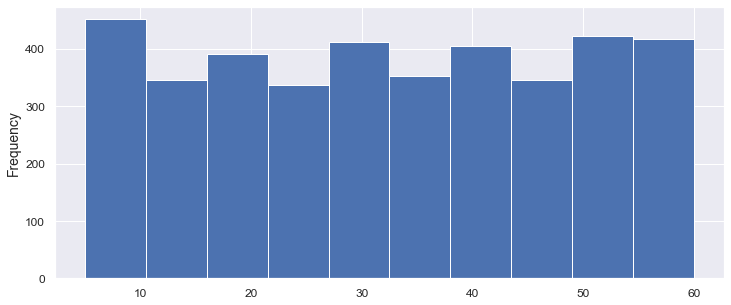

In [31]:
df["video_duration_sec"].plot(kind = "hist", figsize = (12,5), fontsize = 12)
plt.show()

In [32]:
df["author_ban_status"].value_counts().sort_values(ascending=False)

active          3148
under review     427
banned           301
Name: author_ban_status, dtype: int64

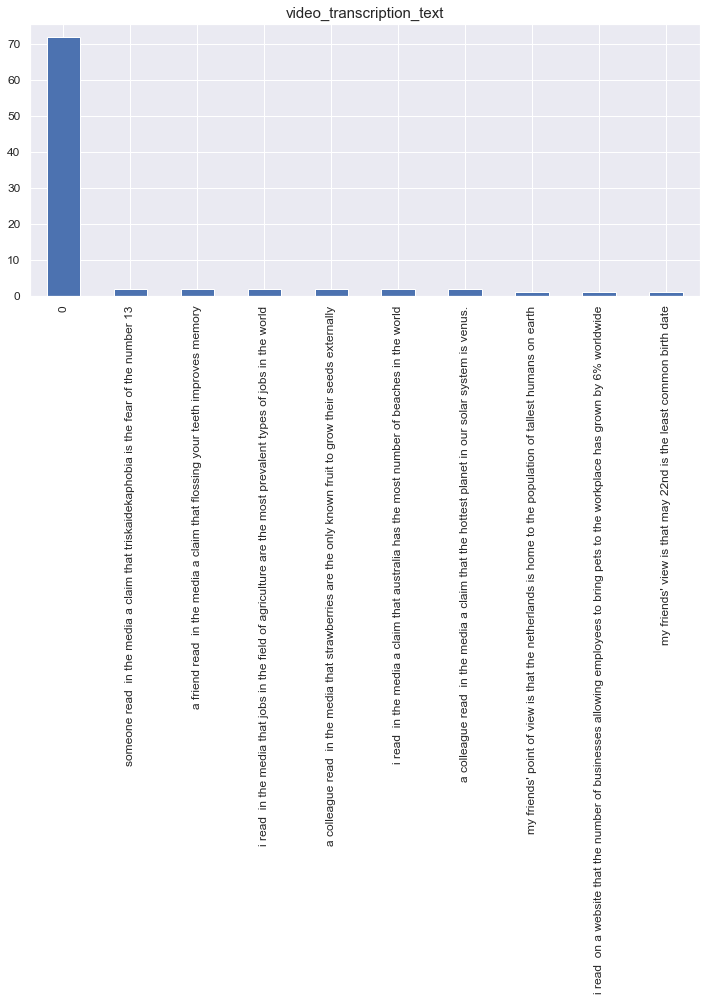

In [33]:
df["video_transcription_text"].value_counts().nlargest(10).plot(kind="bar", figsize = (12,5))
plt.title("video_transcription_text", size = 15)
plt.show()

### Course 3 - Go Beyond the Numbers: Translate Data into Insights

### **Task 2a: Data exploration and cleaning**
### **Task 2b. Assess data types**
### **Task 2c. Select visualization type(s)**

In [34]:
df.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
likes_per_view              float64
comments_per_view           float64
shares_per_view             float64
dtype: object

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

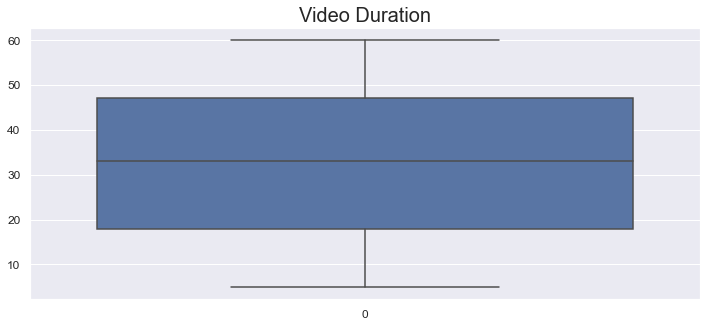

In [35]:
fig, ax = plt.subplots(figsize = (12,5))
sns.boxplot(data=df["video_duration_sec"], showfliers=True)
ax.set_title("Video Duration", fontsize=20)
plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

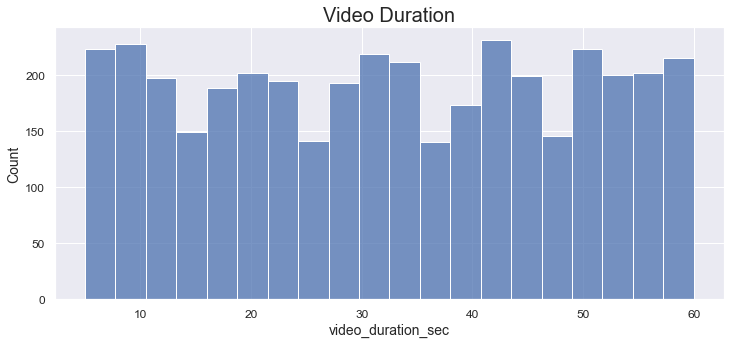

In [36]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.video_duration_sec, data=df, bins=20)
ax.set_title("Video Duration", fontsize=20)
plt.show()

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

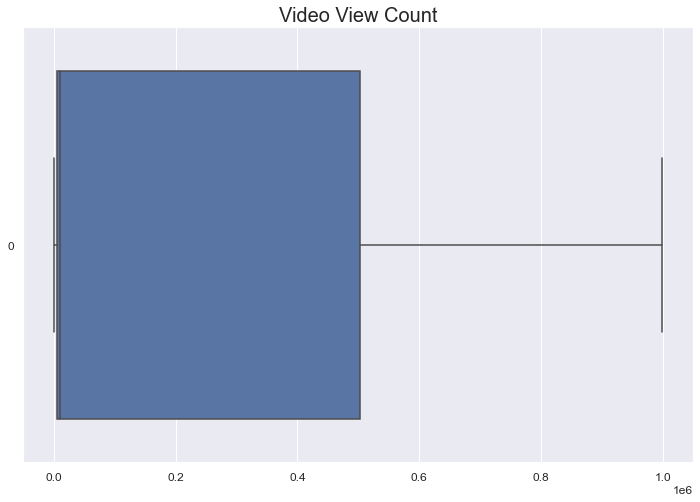

In [37]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=df.video_view_count, orient='h')
ax.set_title("Video View Count", fontsize=20)
plt.show()

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

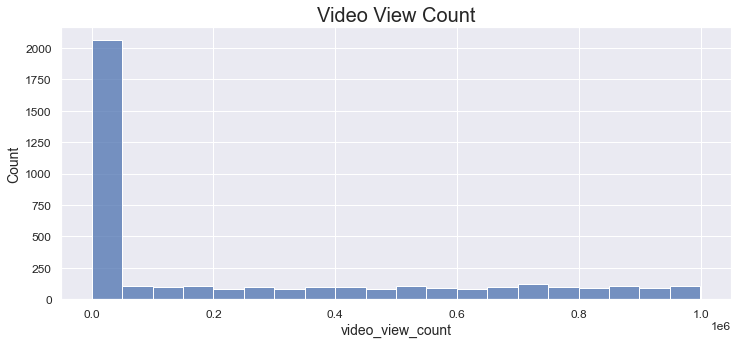

In [38]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.video_view_count, data=df, bins=20)
ax.set_title("Video View Count", fontsize=20)
plt.show()

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

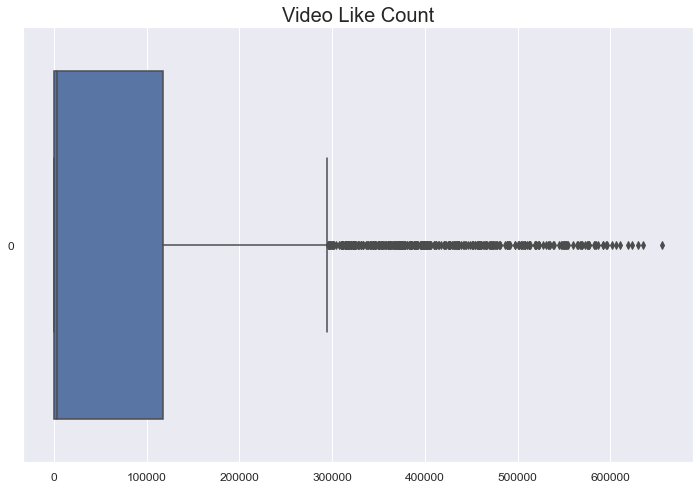

In [39]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=df.video_like_count, orient='h')
ax.set_title("Video Like Count", fontsize=20)
plt.show()

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

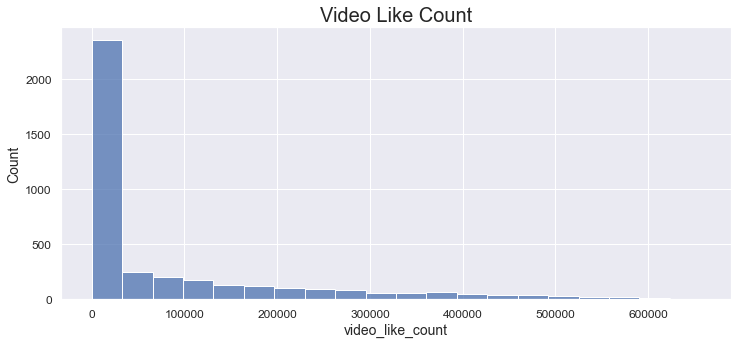

In [40]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.video_like_count, data=df, bins=20)
ax.set_title("Video Like Count", fontsize=20)
plt.show()

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

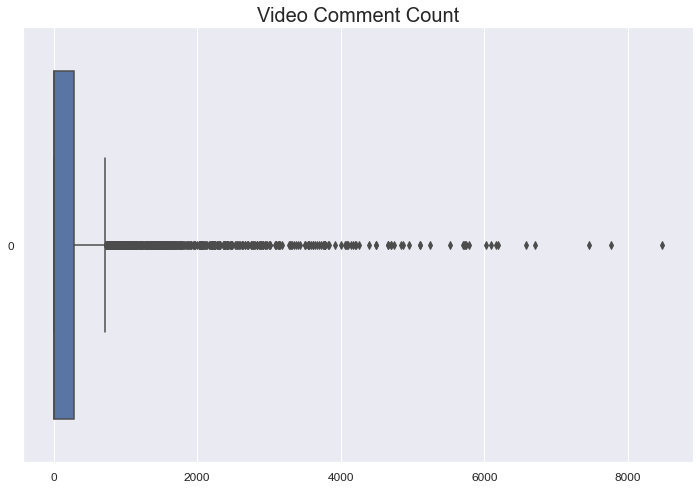

In [41]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=df.video_comment_count, orient='h')
ax.set_title("Video Comment Count", fontsize=20)
plt.show()

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

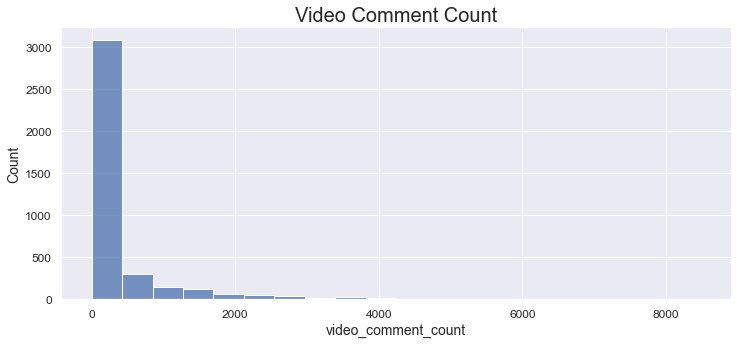

In [42]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.video_comment_count, data=df, bins=20)
ax.set_title("Video Comment Count", fontsize=20)
plt.show()

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

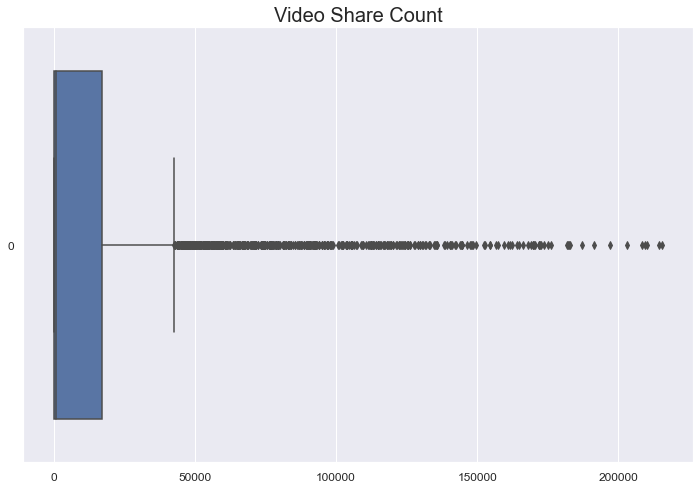

In [43]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=df.video_share_count, orient='h')
ax.set_title("Video Share Count", fontsize=20)
plt.show()

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

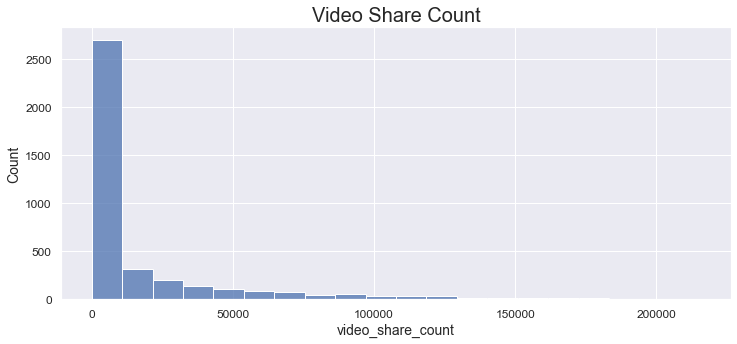

In [44]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.video_share_count, data=df, bins=20)
ax.set_title("Video Share Count", fontsize=20)
plt.show()

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

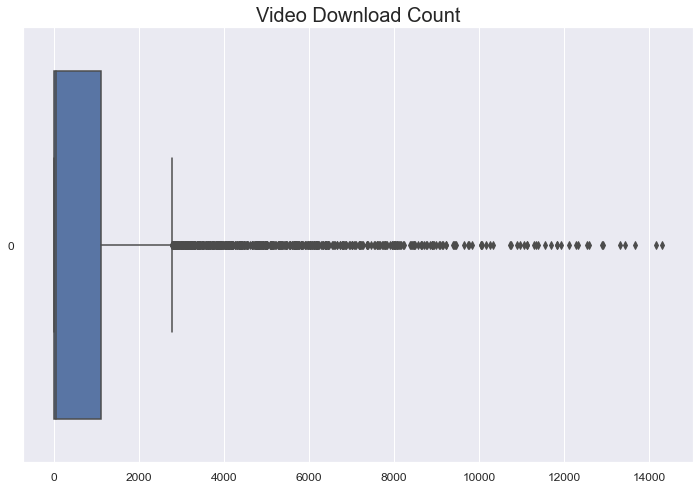

In [45]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=df.video_download_count, orient='h')
ax.set_title("Video Download Count", fontsize=20)
plt.show()

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

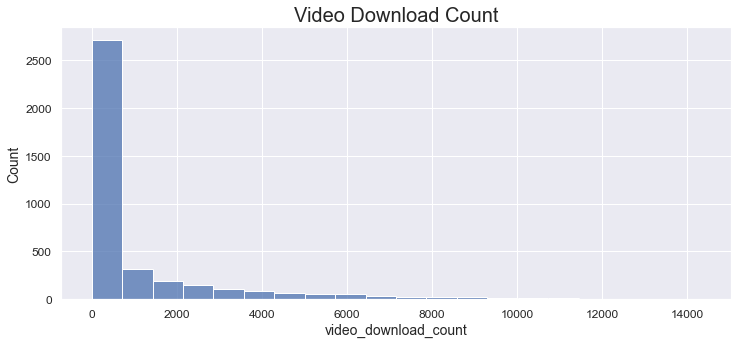

In [46]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.video_download_count, data=df, bins=20)
ax.set_title("Video Download Count", fontsize=20)
plt.show()

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

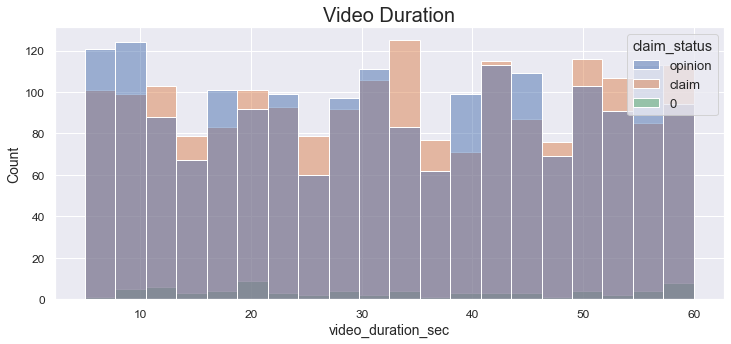

In [47]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.video_duration_sec, hue="claim_status", data=df, bins=20)
ax.set_title("Video Duration", fontsize=20)
plt.show()

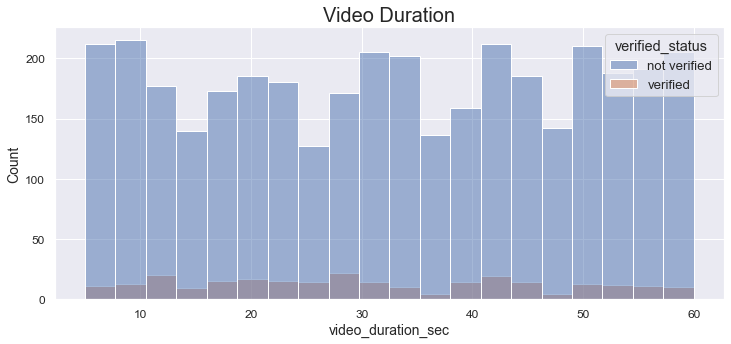

In [48]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.video_duration_sec, hue="verified_status", data=df, bins=20)
ax.set_title("Video Duration", fontsize=20)
plt.show()

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

In [49]:
# Get counts for each group combination of claim status and author ban status
df2 = df.groupby(["claim_status","author_ban_status"], as_index=False)["video_duration_sec"].count()
df2

,claim_status,author_ban_status,video_duration_sec
0,0,active,69
1,0,banned,2
2,0,under review,1
3,claim,active,1316
4,claim,banned,259
5,claim,under review,333
6,opinion,active,1763
7,opinion,banned,40
8,opinion,under review,93


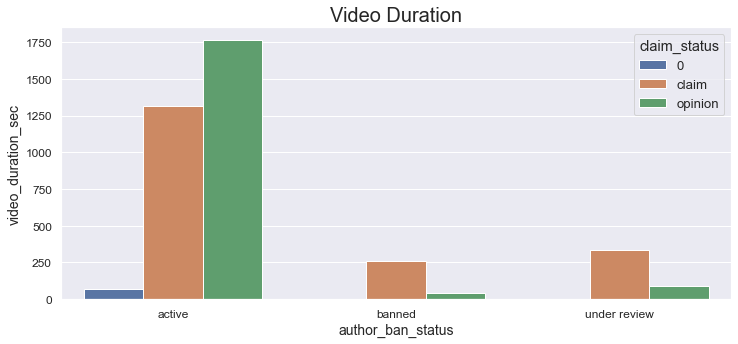

In [50]:
fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(x=df2.author_ban_status, y=df2.video_duration_sec, hue="claim_status", data=df2, ci=None)
ax.set_title("Video Duration", fontsize=20)
plt.show()

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

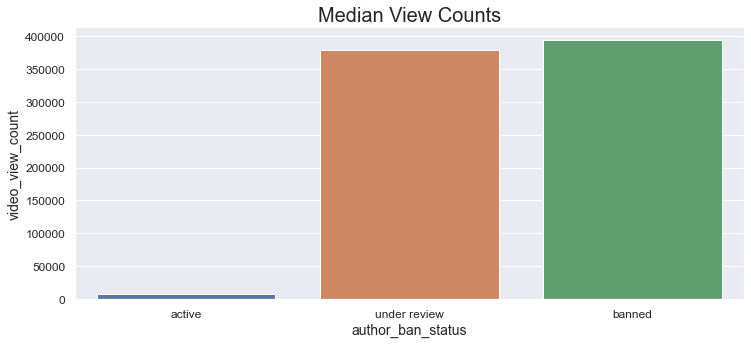

In [51]:
fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(x=df.author_ban_status, y=df.video_view_count, data=df, ci=None, estimator=np.median)
ax.set_title("Median View Counts", fontsize=20)
plt.show()

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

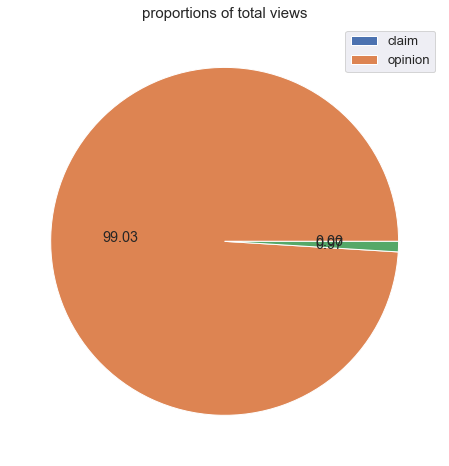

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(x=df.groupby(['claim_status'])["video_view_count"].mean(), autopct='%.2f')

plt.title("proportions of total views", size=15)
plt.legend(["claim","opinion"])
plt.show()


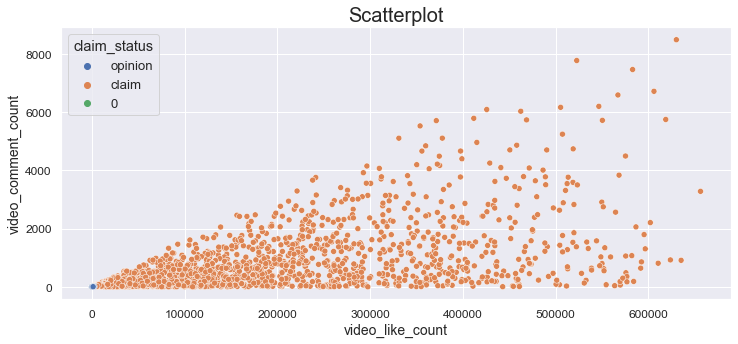

In [53]:
# Create a scatterplot of `video_like_count` versus `video_comment_count` according to 'claim_status'

fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot(x=df.video_like_count, y=df.video_comment_count, hue=df.claim_status, data=df, ci=None)
ax.set_title("Scatterplot", fontsize=20)
plt.show()

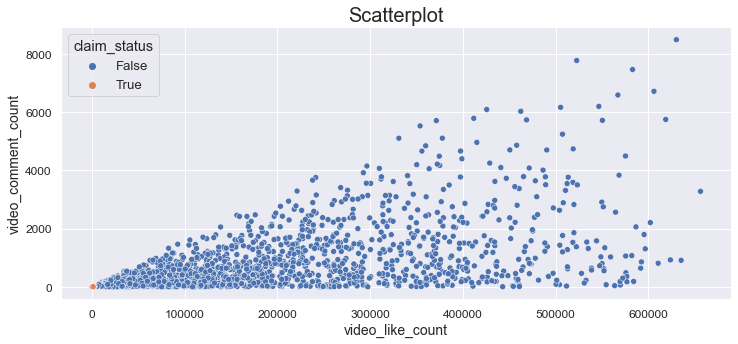

In [54]:
# Create a scatterplot of `video_like_count` versus `video_comment_count` for opinions only

fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot(x=df.video_like_count, y=df.video_comment_count, hue=df.claim_status == "opinion", data=df, ci=None)
ax.set_title("Scatterplot", fontsize=20)
plt.show()

**==========================================================================================================**

### Course 4 - The Power of Statistics

You are interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean value of `video_view_count` for each group of `verified_status` in the sample data.

In [55]:
df.groupby(["verified_status"], as_index=False)["video_view_count"].mean()

,verified_status,video_view_count
0,not verified,263374.73
1,verified,73664.57


In [56]:
notv = df[df["verified_status"] == "not verified"]

In [57]:
notv2 = pd.Series(notv["video_view_count"])
notv2.reset_index(drop=True, inplace=True)
notv2

0        2398.00
1         277.00
2        8568.00
3      389280.00
4      106538.00
          ...   
3610   389516.00
3611   206888.00
3612     4320.00
3613   712761.00
3614   486406.00
Name: video_view_count, Length: 3615, dtype: float64

In [58]:
ver = df[df["verified_status"] == "verified"]
ver

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
1,15776,opinion,1868122816,31,my family's hypothesis is that 12 plants and 5...,verified,active,2346.00,514.00,67.00,4.00,1.00,0.22,0.00,0.03
4,6410,claim,7461468794,59,a colleague learned on a website a claim that...,verified,active,837289.00,15160.00,4085.00,296.00,194.00,0.02,0.00,0.00
11,14083,opinion,1860135209,15,my friends' feeling is that we only see the sa...,verified,active,8584.00,697.00,265.00,14.00,4.00,0.08,0.00,0.03
17,10337,opinion,9233866331,52,my family feels that a banana is technically a...,verified,active,6496.00,2386.00,626.00,13.00,5.00,0.37,0.00,0.10
18,17481,opinion,5219289057,45,i am willing to wager that earth days are gett...,verified,banned,4672.00,1625.00,34.00,12.00,2.00,0.35,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3806,10458,opinion,4899668531,40,my friends think that wild boars wash their food,verified,active,9710.00,2946.00,931.00,63.00,15.00,0.30,0.00,0.10
3830,17534,opinion,1821546644,11,i am willing to wager that j is the only lette...,verified,active,9984.00,3547.00,205.00,41.00,13.00,0.36,0.00,0.02
3831,15315,opinion,8646681165,19,my family's sentiment is that american industr...,verified,active,286.00,17.00,3.00,0.00,0.00,0.06,0.00,0.01
3845,11401,opinion,8138707097,26,my opinion is that marie curie is the only per...,verified,active,9019.00,1374.00,174.00,17.00,6.00,0.15,0.00,0.02


In [59]:
ver2 = pd.Series(ver["video_view_count"])
ver2.reset_index(drop=True, inplace=True)
ver2

0       2346.00
1     837289.00
2       8584.00
3       6496.00
4       4672.00
         ...   
256     9710.00
257     9984.00
258      286.00
259     9019.00
260     7331.00
Name: video_view_count, Length: 261, dtype: float64

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

## Conduct a hypothesis test

Now that you’ve organized your data and simulated random sampling, you’re ready to conduct your hypothesis test. Recall that the two-sample t-test is the standard approach for comparing the means of two independent samples. Let's review the steps for conducting a hypothesis test:

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a significance level
3.   Find the p-value 
4.   Reject or fail to reject the null hypothesis

### Step 1: State the null hypothesis and the alternative hypothesis

The **null hypothesis** is a statement that is assumed to be true unless there is convincing evidence to the contrary. The **alternative hypothesis** is a statement that contradicts the null hypothesis, and is accepted as true only if there is convincing evidence for it. 

In a two-sample t-test, the null hypothesis states that there is no difference between the means of your two groups. The alternative hypothesis states the contrary claim: there is a difference between the means of your two groups. 

We use $H_0$ to denote the null hypothesis, and $H_A$ to denote the alternative hypothesis.

*   $H_0$: There is no difference in the mean video view counts between verified status
*   $H_A$: There is a difference in the mean video view counts between verified status



### Step 2: Choose a significance level

The **significance level** is the threshold at which you will consider a result statistically significant. This is the probability of rejecting the null hypothesis when it is true. The education department asks you to use their standard level of 5%, or 0.05. 

### Step 3: Find the p-value

**P-value** refers to the probability of observing results as or more extreme than those observed when the null hypothesis is true.

Based on your sample data, the difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points. Your null hypothesis claims that this difference is due to chance. Your p-value is the probability of observing an absolute difference in sample means that is 6.2 or greater *if* the null hypothesis is true. If the probability of this outcome is very unlikely - in particular, if your p-value is *less than* your significance level of 5% – then you will reject the null hypothesis.

#### `scipy.stats.ttest_ind()`

For a two-sample $t$-test, you can use `scipy.stats.ttest_ind()` to compute your p-value. This function includes the following arguments:

*   `a`: Observations from the first sample. 
*   `b`: Observations from the second sample.
*   `equal_var`: A boolean, or true/false statement, which indicates whether the population variance of the two samples is assumed to be equal. In our example, you don’t have access to data for the entire population, so you don’t want to assume anything about the variance. To avoid making a wrong assumption, set this argument to `False`. 

Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.


Now you’re ready to write your code and enter the relevant arguments: 

*   `a`: Your first sample refers to the district literacy rate data for STATE21, which is stored in the `OVERALL_LI` column of your variable `sampled_ state21`.
*   `b`: Your second sample refers to the district literacy rate data for STATE28, which is stored in the `OVERALL_LI` column of your variable `sampled_ state28`.
*   `equal_var`: Set to `False` because you don’t want to assume that the two samples have the same variance.

### Step 4: Reject or fail to reject the null hypothesis

To draw a conclusion, compare your p-value with the significance level.

*   If the p-value is less than the significance level, you conclude there is a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you reject the null hypothesis $H_0$.
*   If the p-value is greater than the significance level, you conclude there is *not* a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you fail to reject the null hypothesis $H_0$.

Your p-value of 0.0064, or 0.64%, is less than the significance level of 0.05, or 5%. So, you *reject* the null hypothesis, and conclude that there is a statistically significant difference between the mean district literacy rates of the two states STATE21 and STATE28. 

### Simulate random sampling

Now that you’ve organized your data, use the `sample()` function to take a random sample of 20 districts from each state. First, name a new variable: `sampled_state21`. Then, enter the arguments of the `sample()` function. 

*   `n`: Your sample size is `20`. 
*   `replace`: Choose `True` because you are sampling with replacement.
*   `random_state`: Choose an arbitrary number for the random seed – how about `13490`. 
. 

In [60]:
sampled_notv = notv2.sample(n=100, replace = True, random_state=13490)

In [61]:
sampled_ver = ver2.sample(n=100, replace = True, random_state=39103)

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("There is no difference in the mean video view counts between verified status")
-   $H_1: µ\_1 ≠ µ\_2$ ("There is difference in the mean video view counts between verified status")


## Levene's Test

We can use the Levene's Test in Python to check test significance

```
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')
```
**since the p-value is greater than 0.05 we can assume equality of variance**

**LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)**

In [62]:
scipy.stats.levene(ver2, notv2)

LeveneResult(statistic=96.48770512345232, pvalue=1.6415688423573905e-22)

## T-Test

### One Sample T-Test

In [63]:
t, p = scipy.stats.ttest_1samp ( a= sampled_notv, popmean=9691.50 )

In [64]:
print("T-test value is: ", t)
print("p-value value is: ", p)

T-test value is:  8.25702664175675
p-value value is:  6.733899037933856e-13


### Two Samples T-Test

```
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

```

**Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)**

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender

In [65]:
t, p = scipy.stats.ttest_ind (a= sampled_notv, b= sampled_ver, equal_var = False)

In [66]:
print("T-test value is: ",t)
print("p-value value is: ",p)

T-test value is:  5.2811035395912445
p-value value is:  4.092476180141558e-07


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in relationship between verified_status and video_view_count

## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [67]:
df.corr()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
#,1.00,0.01,-0.02,-0.67,-0.55,-0.45,-0.45,-0.38,-0.30,-0.31,-0.22
video_id,0.01,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.01,-0.00,-0.00
video_duration_sec,-0.02,-0.01,1.00,0.01,0.01,0.01,0.01,-0.01,0.00,-0.03,0.01
video_view_count,-0.67,-0.01,0.01,1.00,0.81,0.67,0.68,0.56,0.27,0.27,0.19
video_like_count,-0.55,-0.01,0.01,0.81,1.00,0.83,0.84,0.68,0.62,0.43,0.43
video_share_count,-0.45,-0.01,0.01,0.67,0.83,1.00,0.71,0.58,0.51,0.36,0.66
video_download_count,-0.45,-0.01,0.01,0.68,0.84,0.71,1.00,0.82,0.51,0.58,0.36
video_comment_count,-0.38,0.00,-0.01,0.56,0.68,0.58,0.82,1.00,0.42,0.77,0.30
likes_per_view,-0.30,0.01,0.00,0.27,0.62,0.51,0.51,0.42,1.00,0.54,0.68
comments_per_view,-0.31,-0.00,-0.03,0.27,0.43,0.36,0.58,0.77,0.54,1.00,0.38


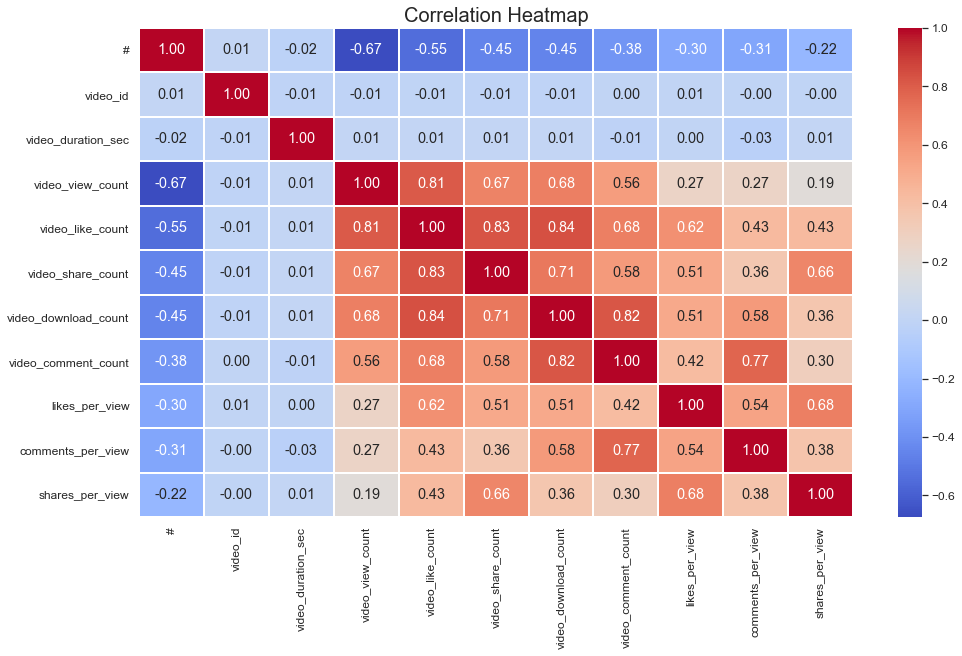

In [68]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

***

#### Python code done by Dennis Lam